<a href="https://colab.research.google.com/github/dhar9571/Capstone-Project-Unsupervised-ML---Netflix-Dataset/blob/main/Capstone_Project_Unsupervised_ML_Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

**Objective**:
The objective of this project is to apply machine learning clustering techniques to the Netflix Movies and Shows dataset in order to group similar movies and TV shows together. By doing so, we aim to uncover patterns and similarities among the content available on Netflix, which can help in content recommendation systems and content categorization.

**Dataset**:
The dataset used in this project is sourced from Netflix and contains information about various movies and TV shows available on the platform. The dataset includes features such as title, director, cast, description, genre, release year, country, and ratings.

**Methodology**:

**Data Preprocessing**:

**Handle missing values**: Check for and handle missing values in the dataset.
Feature selection: Decide which features are relevant for clustering (e.g., genre, release year, country, etc.).
Feature engineering: Convert categorical features into numerical representations (e.g., one-hot encoding) and normalize numerical features.

**Dimensionality Reduction** (Optional):

If the dataset has a large number of features, perform dimensionality reduction techniques (e.g., Principal Component Analysis) to reduce the feature space and improve clustering performance.

**Clustering Algorithm Selection**:

Select appropriate clustering algorithms for the task. Common choices include K-Means, Hierarchical Clustering, and DBSCAN.

**Clustering**:

Apply the chosen clustering algorithm(s) to the preprocessed dataset to group similar movies and TV shows together.
Experiment with different values of hyperparameters (e.g., number of clusters for K-Means) and evaluate the results using internal clustering metrics like Silhouette Score, Davies-Bouldin index, etc.

**Interpretation and Visualization**:

Visualize the clustered data to gain insights into the grouping patterns and identify any interesting clusters.
Analyze the characteristics of each cluster and give meaningful names to the clusters if possible.

**Evaluation**:

Assess the quality of the clustering results. This can be done through visual inspection and, if available, by comparing the clusters with existing metadata (e.g., genre, release year, etc.).
If ground truth labels are available, external evaluation metrics like Adjusted Rand Index or Normalized Mutual Information can be used.

**Recommendations**:

Based on the clustering results, build a content recommendation system that suggests similar movies or TV shows to users based on their viewing history or preferences.

**Deployment**
Deploy the clustering model and the recommendation system in a user-friendly interface (web application, mobile app, etc.).

# **GitHub Link -**

https://github.com/dhar9571/Clustering-Project-Unsupervised---Netflix-Movies-and-TV-Shows-DatasetML.git

# **Problem Statement**


Netflix, the world's leading streaming entertainment service, hosts an extensive library of movies and TV shows catering to a diverse audience. With such a vast collection, it becomes challenging for users to discover content that aligns with their preferences. To enhance user experience and improve content recommendation, the goal of this project is to perform clustering analysis on the Netflix Movies and Shows dataset.

The Netflix Movies and Shows dataset contains a wealth of information about the content available on the platform. Each entry in the dataset represents a movie or a TV show and includes features such as title, director, cast, description, genre, release year, country, and ratings. The objective is to apply machine learning clustering techniques to group similar movies and TV shows together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Dataset Loading

In [3]:
# mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Project Unsupervised ML - Netflix Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look

# setting up to show all features

pd.set_option('display.max_columns',None)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [7]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

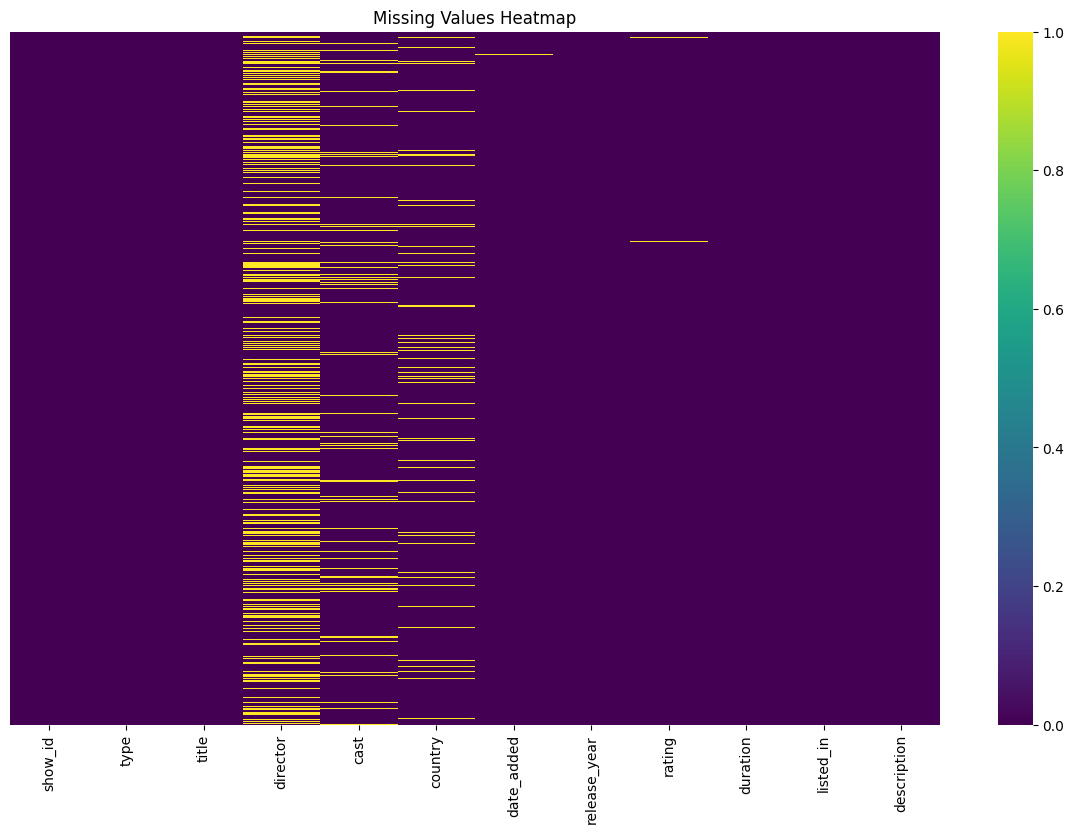

In [10]:
# Visualizing the missing values

# setting up plot size

plt.figure(figsize=(15, 9))

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Missing Values Heatmap")

### What did you know about your dataset?

1. The dataset has 7787 number of rows and 12 features.
2. The dataset has no duplicate values.
3. The dataset has 2389 null values in director columns, 718 null values in cast column, 507 in country column, 10 values in date_added column and 7 null values in rating column.
4. Currently the dataset has only 1 numerical feature which is release_year.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

**show_id**: A unique identifier for each movie or TV show in the dataset.

**type**: Indicates whether the entry is a "Movie" or a "TV Show."

**title**: The title of the movie or TV show.

**director**: The director(s) of the movie or TV show. In the case of TV shows, this field may be blank or contain multiple directors.

**cast**: The main cast or actors involved in the movie or TV show. This field may contain multiple actors' names.

**country**: The country of origin for the movie or TV show.

**date_added**: The date when the movie or TV show was added to the Netflix platform.

**release_year**: The year when the movie or TV show was originally released.

**rating**: The content rating assigned to the movie or TV show (e.g., PG, TV-MA, etc.).

**duration**: The duration of the movie or TV show, typically represented in minutes for movies and seasons for TV shows.

**listed_in**: The genre(s) or category(s) in which the movie or TV show is classified.

**description**: A brief description or synopsis of the movie or TV show.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

df.nunique().reset_index().rename(columns = {'index':'column',0:'unique_values'}).sort_values(by='unique_values',ascending=False)

,column,unique_values
0,show_id,7787
2,title,7787
11,description,7769
4,cast,6831
3,director,4049
6,date_added,1565
5,country,681
10,listed_in,492
9,duration,216
7,release_year,73


## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [14]:
# remove the rows where date_added is null as number of empty rows are below 5% of total observations.

df = df[~df.date_added.isna()]

In [15]:
# remove the rows where rating is null as number of empty rows are below 5% of total observations.

df = df[~df.rating.isna()]

In [16]:
# replace null values of country column with mode as it will not change the distribution of the data:

df.country.fillna(df.country.mode()[0],inplace=True)

<ipython-input-16-c8d4e1f5f0d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country.fillna(df.country.mode()[0],inplace=True)


In [17]:
# removing show_id column which has unique IDs for all the rows:

df.drop(columns=['show_id'],inplace=True, axis=1)

<ipython-input-17-3e56f6c94e45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['show_id'],inplace=True, axis=1)


In [18]:
# replacing director and cast features' null values with 'unknown' as director column cannot be replaced with mode due to incorrect information:

df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)

<ipython-input-18-d37f8d764511>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director'].fillna('unknown',inplace=True)
<ipython-input-18-d37f8d764511>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'].fillna('unknown',inplace=True)


In [19]:
# creating new dataset to keep original dataset unchanged:

df1 = df

In [20]:
# For country and listed_in (genres) features, taking  only first values as main country and regions:

df1['country'] = df1['country'].apply(lambda x: x.split(',')[0])
df1['listed_in'] = df1['listed_in'].apply(lambda x: x.split(',')[0])

<ipython-input-20-67d7f6169983>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country'] = df1['country'].apply(lambda x: x.split(',')[0])
<ipython-input-20-67d7f6169983>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['listed_in'] = df1['listed_in'].apply(lambda x: x.split(',')[0])


In [21]:
# Creating a function to convert the 'Se' to Sea in duration feature:

def con(string):

  list1 = string.split(" ")

  if list1[-1]=='Se':
    list1[-1]='Sea'

  return " ".join(list1)

In [22]:
# applying the function to the feature:

df1.duration = df1.duration.apply(lambda x: con(x))

In [23]:
# sepearting the datasets for TV SHOW and Movies:

show = df1[df.type=='TV Show']
movies = df1[df.type=='Movie']

In [24]:
movies.duration

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5372, dtype: object

In [25]:
# removing the ' min' from duration of movies to convert values in integer:

movies.duration = movies.duration.apply(lambda x: x[:-4])

<ipython-input-25-31a56a3cdaab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration = movies.duration.apply(lambda x: x[:-4])


In [26]:
# changing the data type of duration for movies duration feature:
movies.duration = movies.duration.astype('int')

<ipython-input-26-998ee655a0db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration = movies.duration.astype('int')


In [27]:
df['is_movie'] = df['type'].apply(lambda x: 0 if x=='TV Show' else 1)

### What all manipulations have you done and insights you found?

1. Removed the rows where date_added is null as number of empty rows are below 5% of total observations.
2. Removed the rows where rating is null as number of empty rows are below 5% of total observations.
3. Replaced null values of country column with mode as it will not change the distribution of the data.
4. Removed show_id column which has unique IDs for all the rows.
5. Replaced director and cast features' null values with 'unknown' as director column cannot be replaced with mode due to incorrect information.
6. For country and listed_in (genres) features, took  only first values as main country and regions.
7. Removed the ' min' from duration of movies to convert values in integer.
8. Added a new numerical column to check the content is a movie or show (0 or 1).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Show Type - Univariate

Text(0, 0.5, 'Count')

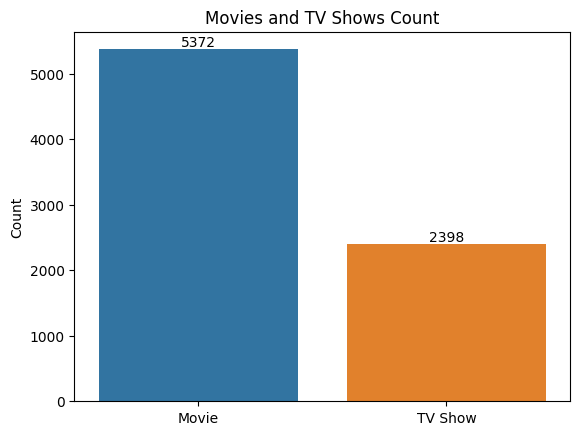

In [ ]:
# Chart - 1 visualization code

ax = sns.barplot(x=df.type.value_counts().index,y=df.type.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Movies and TV Shows Count')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. The dataset contains a higher number of movies (5372) compared to TV shows (2398). This indicates that movies are more prevalent in the dataset than TV shows.
2. The higher count of movies suggests that the dataset may have a more diverse range of movies available for analysis compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of movies and TV shows in the dataset can inform content strategy and investment decisions. If the dataset reflects the actual content distribution on the platform, businesses can use this insight to optimize their content acquisition and production efforts. For example, they may choose to focus more on acquiring popular movies or producing original TV shows to cater to the audience's preferences.

#### Chart - 2 - Rating count - Univairate


Text(0, 0.5, 'Count')

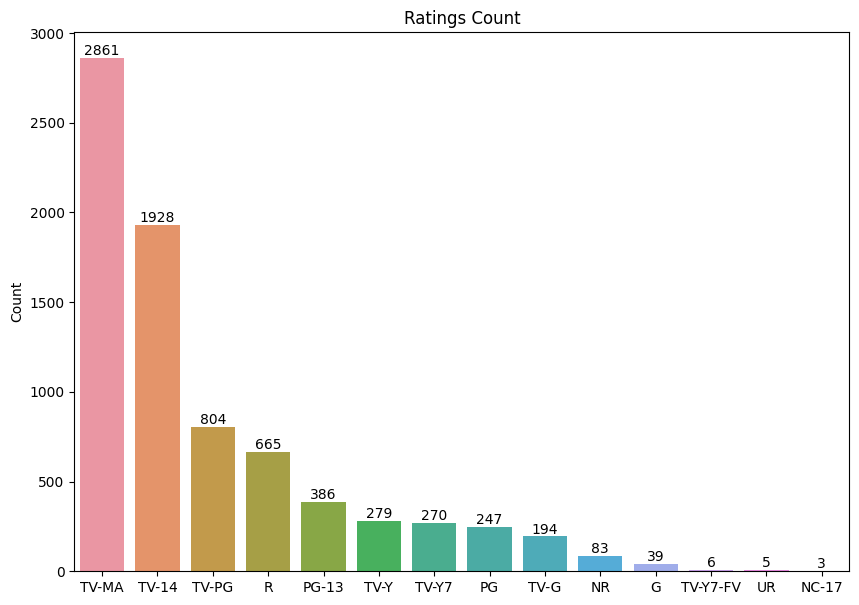

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(10,7))

ax = sns.barplot(x=df.rating.value_counts().index,y=df.rating.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Ratings Count')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

TV-MA, TV-14 and TV-PG ratings' movies have the highest counts which indiciates that movies and shows are mostly focused to these ratings.

#### Chart - 3 - Country Count - Univariate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'France'),
  Text(6, 0, 'South Korea'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Turkey')])

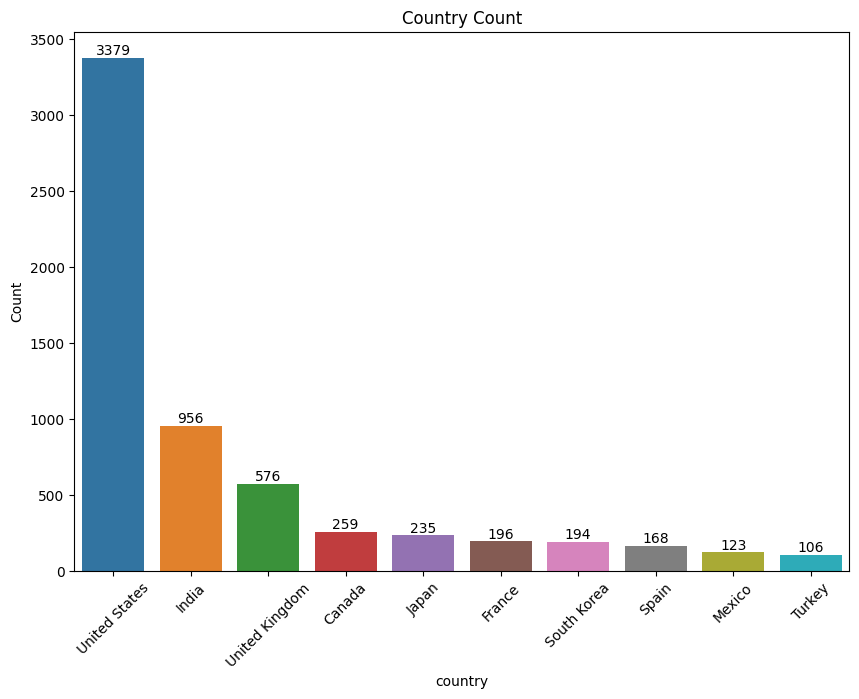

In [ ]:
# Chart - 3 visualization code

# creating a dataset for country counts:

country_count = df1.country.value_counts().reset_index().rename(columns={'index':'country','country':'count'}).sort_values(by='count',ascending=False).head(10)

plt.figure(figsize=(10,7))

ax = sns.barplot(x=country_count["country"],y=country_count["count"])

for count in ax.containers:
  ax.bar_label(count)

plt.title('Country Count')
plt.ylabel('Count')
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies were primarily made in USA, India and United Kingdom.

#### Chart - 4 - Release Year Count - Univariate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

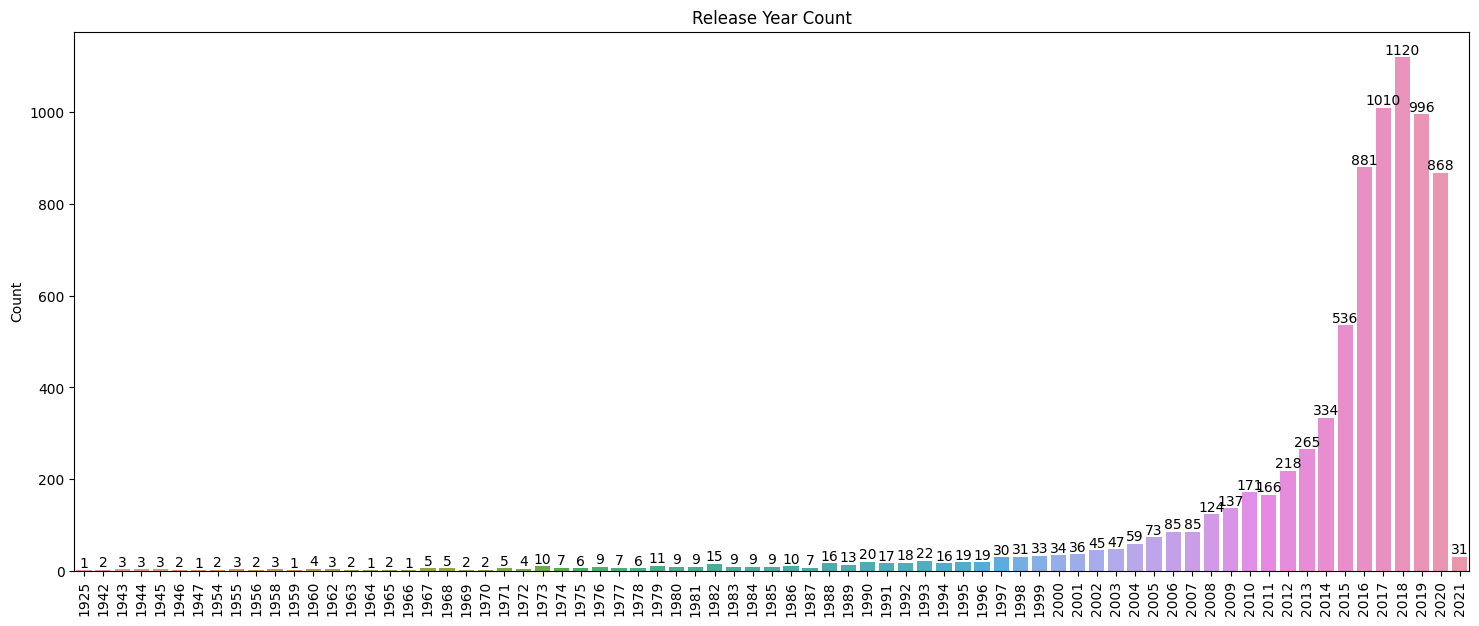

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(18,7))

ax = sns.barplot(x=df.release_year.value_counts().index,y=df.release_year.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Release Year Count')
plt.ylabel('Count')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies were released in 2017, 2018 and 2019 years.
2. Movies growth was significant in the decade of 2010.

#### Chart - 5 - Duration Distribution - Univariate

Text(0.5, 1.0, 'Duration Distribution')

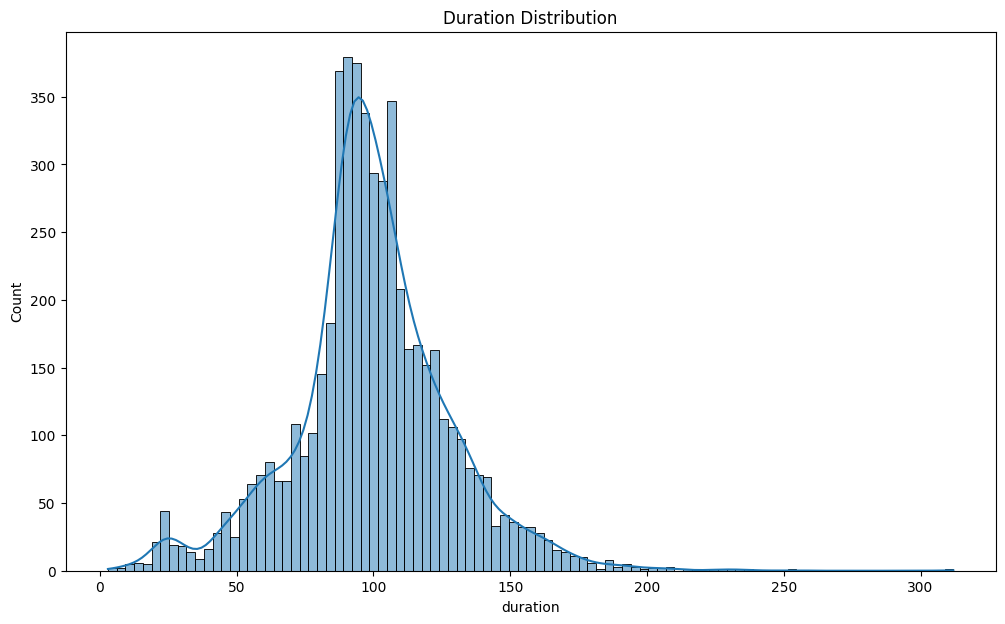

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(12,7))

sns.histplot(movies['duration'],kde=True)

plt.title('Duration Distribution')

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of a dataset. They allow you to see how data is spread across different bins or intervals, giving insights into the central tendency, spread, and shape of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies are in the range from 80-130 minutes.
2. The distribution of the duration feature data is Normal.
3. Most of the movies' duration is centered arond the mean.

#### Chart - 6 - Season Wise Show - Univariate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1 Season'),
  Text(1, 0, '2 Seasons'),
  Text(2, 0, '3 Seasons'),
  Text(3, 0, '4 Seasons'),
  Text(4, 0, '5 Seasons'),
  Text(5, 0, '6 Seasons'),
  Text(6, 0, '7 Seasons'),
  Text(7, 0, '8 Seasons'),
  Text(8, 0, '9 Seasons'),
  Text(9, 0, '10 Seasons'),
  Text(10, 0, '11 Seasons'),
  Text(11, 0, '12 Seasons'),
  Text(12, 0, '15 Seasons'),
  Text(13, 0, '13 Seasons'),
  Text(14, 0, '16 Seasons')])

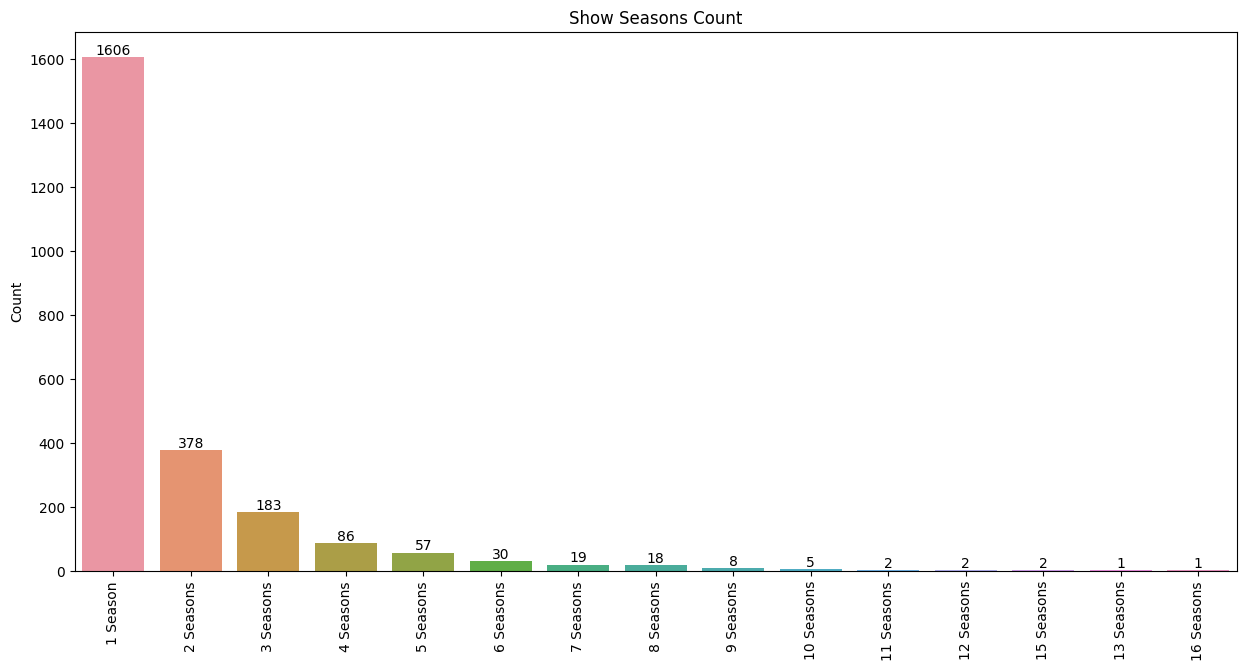

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(15,7))

ax = sns.barplot(x=show.duration.value_counts().index,y=show.duration.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Show Seasons Count')
plt.ylabel('Count')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Shows with only 1 season has the highest count.
2. Count of Season wise shows in reducing as the number of seasons reduce.

#### Chart - 7 - Release Year vs Duration - Bivariate

Text(0.5, 1.0, 'Release Year and Duration')

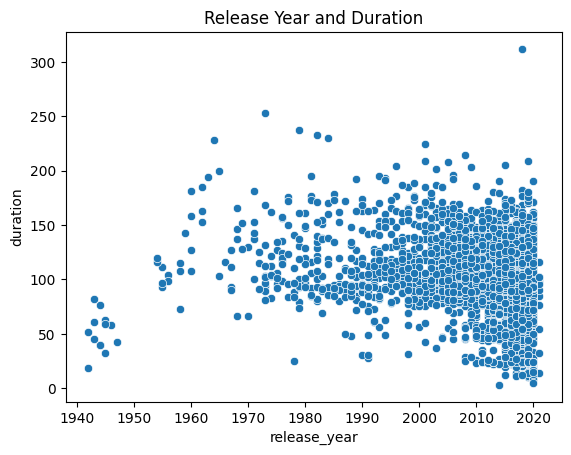

In [ ]:
# Chart - 7 visualization code

sns.scatterplot(x=movies.release_year, y=movies.duration)

plt.title('Release Year and Duration')

##### 1. Why did you pick the specific chart?

Scatter plots are used to visualize the relationship between two numerical variables. They help us understand how one variable changes concerning the other, allowing us to identify patterns, trends, correlations, or potential associations between the two variables.

##### 2. What is/are the insight(s) found from the chart?

There is no linear relationship between release year and duration which means there is no specific trend of movies duration with respect to release time.

#### Chart - 8 - Countries with Highest Average Duration - Bivariate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Croatia'),
  Text(1, 0, 'West Germany'),
  Text(2, 0, 'Soviet Union'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Iran'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Romania'),
  Text(7, 0, 'Somalia'),
  Text(8, 0, 'South Korea'),
  Text(9, 0, 'Bangladesh')])

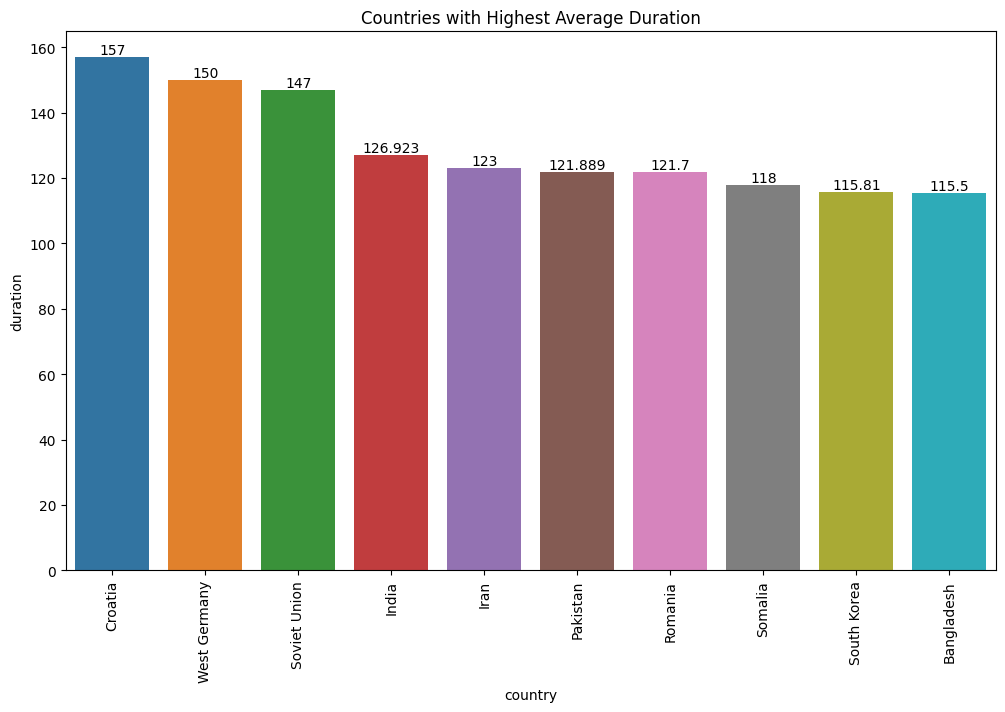

In [ ]:
# Chart - 8 visualization code

country_duration = movies.groupby('country')['duration'].mean().reset_index().sort_values(by='duration',ascending=False).head(10)

plt.figure(figsize=(12,7))

ax = sns.barplot(x=country_duration['country'],y=country_duration['duration'])

for i in ax.containers:
  ax.bar_label(i)


plt.title('Countries with Highest Average Duration')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Movies shoot in Croatia has the highest average duration.
2. After that, the outher countries are West Germany, Soviet Union, India and so on.

#### Chart - 9 - Correlation Heatmap - Multivariate

<ipython-input-112-e0fe8e3dd005>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies.corr()


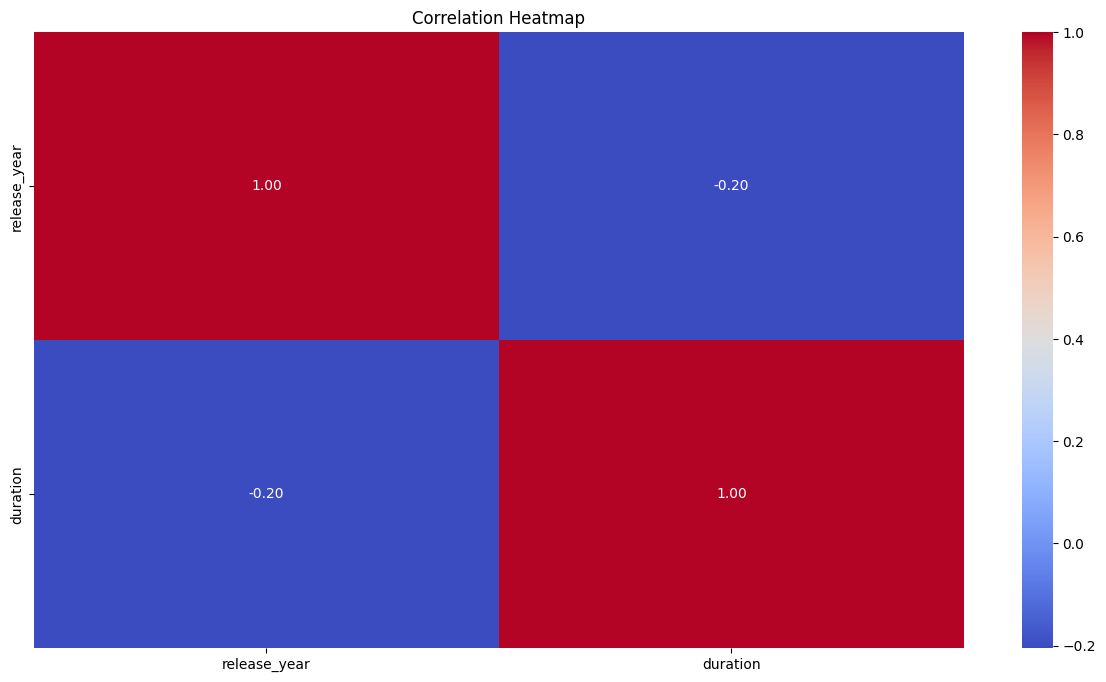

In [ ]:
# Correlation Heatmap visualization code

# calculation of correlation matrix:

corr = movies.corr()

# creating plot:

plt.figure(figsize=(15, 8))  # Set the figure size (adjust as needed)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps visually represent the strength and direction of relationships between pairs of numerical variables. They help identify which variables have a positive or negative correlation, or if there is no significant correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

Release Year and Duration are the only two numerical features and are not correlated with each other.

#### Chart - 10 - Pair Plot

<Figure size 1500x800 with 0 Axes>

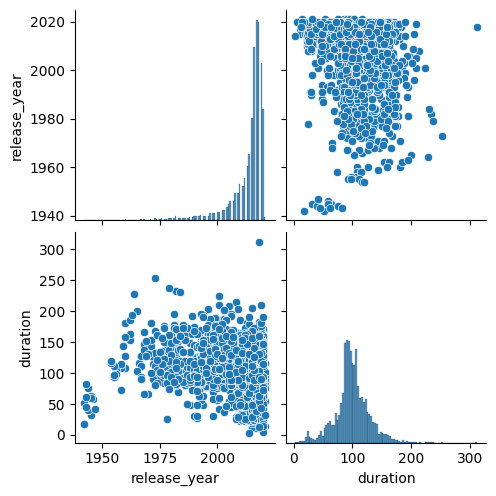

In [ ]:
# Pair Plot visualization code

plt.figure(figsize=(15,8))

sns.pairplot(movies[['type','country', 'release_year', 'rating', 'duration', 'listed_in']])
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots provide a quick and effective way to visualize relationships between multiple numerical variables in a dataset. It allows you to observe how each pair of variables interacts with one another.

##### 2. What is/are the insight(s) found from the chart?

1. Release_year feature has data which is skewed to left(negatively skewed).
2. Duration feature's data is normally distributed or centered around the mean.
3. Release_year and duration features are not correlated with each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant relationship between Rating (categorical) and Duration (numerical feature).

**Alternate Hypothesis**: There is a significant relationship between Rating and Duration features.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Installing library to perform required Test:
from scipy.stats import f_oneway

# Group the 'Duration' values by 'Rating' categories
rating_groups = [group['duration'] for name, group in movies.groupby('rating')]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*rating_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between Rating and Duration.")
else:
    print("There is no significant relationship between Rating and Duration.")

F-statistic: 89.67685424604062
P-value: 1.7358783854542381e-217
There is a significant relationship between Rating and Duration.


##### Which statistical test have you done to obtain P-Value?

Performed One Way Anova Test.

##### Why did you choose the specific statistical test?

When we have more than two groups (categories) in your categorical variable and we want to compare the means of a numerical variable across all the groups, ANOVA is a suitable choice. It allows us to test if there is a significant difference in the means of the numerical variable between any of the groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant relationship between Type (categorical) and Release Year (numerical feature).

**Alternate Hypothesis**: There is a significant relationship between Type and Release Year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Importing required library for T-test
from scipy.stats import ttest_ind

# creating different datasets for categories of type column with release year:

movie_years = df1[df1['type'] == 'Movie']['release_year']
tvshow_years = df1[df1['type'] == 'TV Show']['release_year']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(movie_years, tvshow_years)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between Movie Type and Release Year.")
else:
    print("There is no significant relationship between Movie Type and Release Year.")


T-statistic: -15.546339713773646
P-value: 1.0790468769287327e-53
There is a significant relationship between Movie Type and Release Year.


##### Which statistical test have you done to obtain P-Value?

Performed T-Test.

##### Why did you choose the specific statistical test?

When we want to compare the means of a numerical variable between two distinct groups, such as comparing the heights of men and women or comparing the test scores of two study groups, we opt T-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant association between "Rating" and "Listed_In" categories.

**Alternative Hypothesis**: There is a significant association between "Rating" and "Listed_In" categories.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# importing required library for Chi2 Test:
from scipy.stats import chi2_contingency

# Create a contingency table to represent the frequency of occurrences of each combination
contingency_table = pd.crosstab(df1['rating'], df1['listed_in'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Rating and Listed_In.")
else:
    print("There is no significant association between Rating and Listed_In.")


Chi-square statistic: 9144.851540084619
P-value: 0.0
There is a significant association between Rating and Listed_In.


##### Which statistical test have you done to obtain P-Value?

Performed Chi-2 Test.

##### Why did you choose the specific statistical test?

The chi-square test is chosen when we want to determine if there is a significant association or relationship between two categorical variables. It is used to assess whether the observed frequency distribution of data differs significantly from the expected frequency distribution under the assumption of independence between the two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Already Handled the missing values in Data Wrangling portion.

In [28]:
# Checking null values in original dataset:

df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
is_movie        0
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

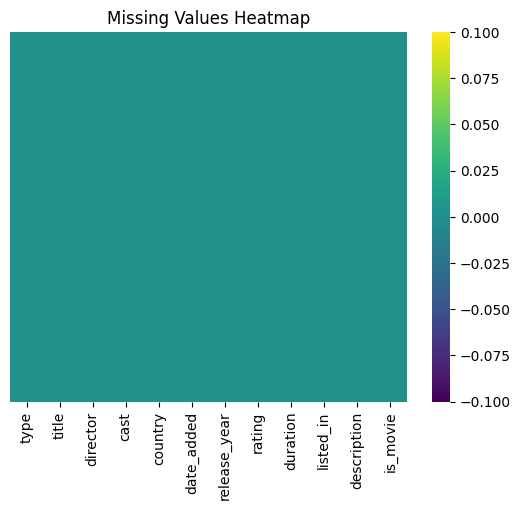

In [29]:
# plotting null values heatmap:

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Missing Values Heatmap")

Observation: There are no null values in the dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Removed the rows where date_added is null as number of empty rows are below 5% of total observations.
2. Removed the rows where rating is null as number of empty rows are below 5% of total observations.
3. Replaced null values of country column with mode as it will not change the distribution of the data.

### 2. Handling Outliers

<Axes: xlabel='release_year'>

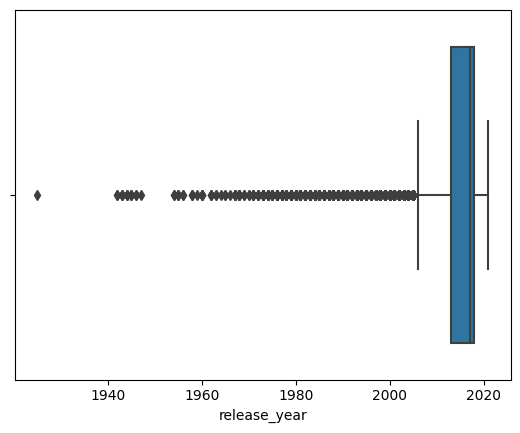

In [30]:
# Plotting boxplot for numerical features to check outliers:

sns.boxplot(x=df.release_year)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The numerical data represent the actual or real time data. Therefore, removing outliers may cause loss of information. Hence, skipping this step.

### 2. Categorical Encoding

In [31]:
# Removing type feature as already converted it into is_movie feature:

df.drop(columns=['type'],axis=1,inplace=True)

In [32]:
# importing required library for label encoding:

from sklearn.preprocessing import LabelEncoder

# creating object:

le = LabelEncoder()

# fitting the encoder on feature:

df.rating = le.fit_transform(df.rating)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used Label Encoding technique to convert rating feature values to integers. It is usable when the number of classes in a feature are more than 5.

In [33]:
# applying function on date_added feature:



### 3. Feature Values Handling

In [34]:
# creating two new features for duation of movie and show

df['movie_duration'] = df.apply(lambda row: row['duration'] if row['is_movie'] == 1 else 0, axis=1)
df['show_duration'] = df.apply(lambda row: row['duration'] if row['is_movie'] == 0 else 0, axis=1)

In [35]:
# Creating a function to convert string of movie_duration feature into integer:

def con_min(num):

  if num != 0:
    list1 = num.split(" ")
    return int(list1[0])
  else:
    return num


# Applying con_min function:

df.movie_duration = df.movie_duration.apply(lambda x: con_min(x))

In [36]:
# applying the function on show_duration to convert the values to integers:

df.show_duration = df.show_duration.apply(lambda x: con_min(x))

# removing duration feature as we have already extracted required information from it:

df.drop(['duration'],axis=1,inplace=True)

In [37]:
# creating a function to extract year from date_added:

def ext_year(date):

  list1 = date.split(",")

  return int(list1[-1])


# applying to function on date_added feature:

df.date_added = df.date_added.apply(lambda x: ext_year(x))

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [38]:
# Creating final_text column using all textual columns which one is used for model building purpose.

df['textual_data'] = df['description'] + ' ' + df['listed_in'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['director']

In [39]:
# Dropping the original columns:

df.drop(columns=['description','listed_in','cast','country','director'],axis=1,inplace=True)

df.head()

,title,date_added,release_year,rating,is_movie,movie_duration,show_duration,textual_data
0,3%,2020,2020,8,0,0,4,In a future where the elite inhabit an island ...
1,7:19,2016,2016,8,1,93,0,After a devastating earthquake hits Mexico Cit...
2,23:59,2018,2011,5,1,78,0,"When an army recruit is found dead, his fellow..."
3,9,2017,2009,4,1,80,0,"In a postapocalyptic world, rag-doll robots hi..."
4,21,2020,2008,4,1,123,0,A brilliant group of students become card-coun...


#### Lower Casing

In [40]:
# Lower Casing
df['textual_data']= df['textual_data'].str.lower()

# Checking the manipulation
df.iloc[281,]['textual_data']

'due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona. comedies tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema india a. l. vijay'

#### Removing Punctuations

In [41]:
# Crating a function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [42]:
# Removing Punctuations from the content_detail
df['textual_data']= df['textual_data'].apply(remove_punctuations)

# Checking the observation after manipulation
df.iloc[281,]['textual_data']


'due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona comedies tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema india a l vijay'

#### Removing URLs, words and digits contain digits.

In [43]:
# Creating a function to remove URLs, words and digits contain digits:

def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [44]:

# Remove URLs & Remove words and digits contain digits
df['textual_data']= df['textual_data'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df.iloc[281,]['textual_data']

'due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona comedies tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema india a l vijay'

#### Removing Stopwords & Removing White spaces

In [45]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Creating a function to remove stopwords:

def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [47]:
# Remove URLs & Remove words and digits contain digits
df['textual_data']= df['textual_data'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df.iloc[281,]['textual_data']

'due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona comedies tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema india l vijay'

#### Tokenization

In [48]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df['textual_data']= df['textual_data'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df.iloc[281,]['textual_data']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona',
 'comedies',
 'tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'india',
 'l',
 'vijay']

#### Text Normalization

In [49]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [50]:
# Creating a function to lemmatize sentences:

def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [51]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df['textual_data']= df['textual_data'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df.iloc[281,]['textual_data']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona comedy tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema india l vijay'

#### Part of speech tagging

In [52]:
# tokenize the text into words before POS Taging
df['pos_tags'] = df['textual_data'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df.head(5)

,title,date_added,release_year,rating,is_movie,movie_duration,show_duration,textual_data,pos_tags
0,3%,2020,2020,8,0,0,4,future elite inhabit island paradise far crowd...,"[(future, JJ), (elite, JJ), (inhabit, NN), (is..."
1,7:19,2016,2016,8,1,93,0,devastating earthquake hit mexico city trapped...,"[(devastating, VBG), (earthquake, NN), (hit, V..."
2,23:59,2018,2011,5,1,78,0,army recruit found dead fellow soldier forced ...,"[(army, NN), (recruit, NN), (found, VBN), (dea..."
3,9,2017,2009,4,1,80,0,postapocalyptic world ragdoll robot hide fear ...,"[(postapocalyptic, JJ), (world, NN), (ragdoll,..."
4,21,2020,2008,4,1,123,0,brilliant group student become cardcounting ex...,"[(brilliant, JJ), (group, NN), (student, NN), ..."


#### Text Vectorization

In [54]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance (to avoid system crash, considerring only 30000 features)
tfidfv = TfidfVectorizer(max_features=30000)

In [55]:
# Fitting on TfidfVectorizer
X= tfidfv.fit_transform(df['textual_data'])

# Checking shape of the formed document matrix
print(X.shape)

(7770, 30000)


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After textual data preprocessing, there are 45983 features/columns created which extremely high from model training point of view. This huge number of feature can cause very slow training and inaccuracy in model performance. Therefore Dimensionality is needed to avoid this situation.

In [56]:
# DImensionality Reduction (If needed)

# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(X.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [4.06670460e-03 3.46295279e-03 2.91784729e-03 ... 1.03416128e-35
 3.79907922e-36 2.02044283e-37]


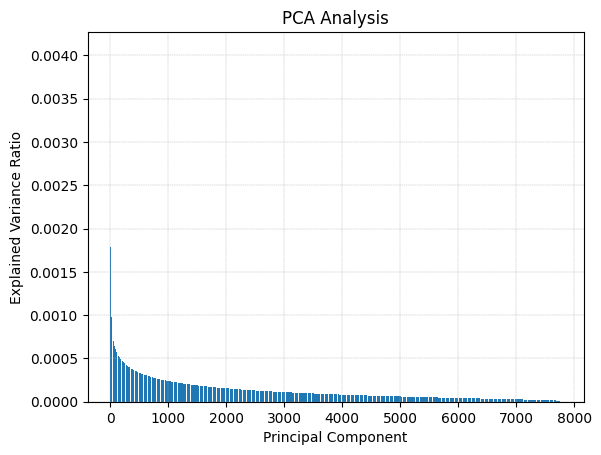

In [57]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions

num_components = len(variance)
components = np.arange(1, num_components + 1)

fig, ax = plt.subplots()
ax.bar(components, variance)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

For better model performance, it would be better to consider only those number of PC's that can capture 95% of variance.

In [59]:
## Passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(X.toarray())
x_transformed = pca_tuned.transform(X.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 6025)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***